Imports

In [50]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
import data_cleaning_visualization as cv
cleaner=cv.DataCleaningAndVisualization()

Read dataset and show first 5 rows

In [18]:
df = pd.read_csv('CarPrice_Assignment.csv')
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


Data contains no null rows, 10 / 25 features are strings (objects) so some need encoding and some need to be dropped.

In [19]:
cleaner.data_info(df)


,Col,dtype,n_uniques,n_nan,unique_val,duplicated
0,car_ID,int64,205,0,"[1, 142, 132, 133, 134, 135, 136, 137, 138, 139]",0
1,symboling,int64,6,0,"[0, 1, 2, 3, -1, -2]",0
2,CarName,object,147,0,"[toyota corona, toyota corolla, peugeot 504, s...",0
3,fueltype,object,2,0,"[gas, diesel]",0
4,aspiration,object,2,0,"[std, turbo]",0
5,doornumber,object,2,0,"[four, two]",0
6,carbody,object,5,0,"[sedan, hatchback, wagon, hardtop, convertible]",0
7,drivewheel,object,3,0,"[fwd, rwd, 4wd]",0
8,enginelocation,object,2,0,"[front, rear]",0
9,wheelbase,float64,53,0,"[94.5, 93.7, 95.7, 96.5, 97.3, 98.4, 104.3, 10...",0


Column 'car_ID' is not categorical.
Column 'CarName' is not categorical.
Column 'wheelbase' is not categorical.
Column 'carlength' is not categorical.
Column 'carwidth' is not categorical.
Column 'carheight' is not categorical.
Column 'curbweight' is not categorical.
Column 'enginesize' is not categorical.
Column 'boreratio' is not categorical.
Column 'stroke' is not categorical.
Column 'compressionratio' is not categorical.
Column 'horsepower' is not categorical.
Column 'peakrpm' is not categorical.
Column 'citympg' is not categorical.
Column 'highwaympg' is not categorical.
Column 'price' is not categorical.


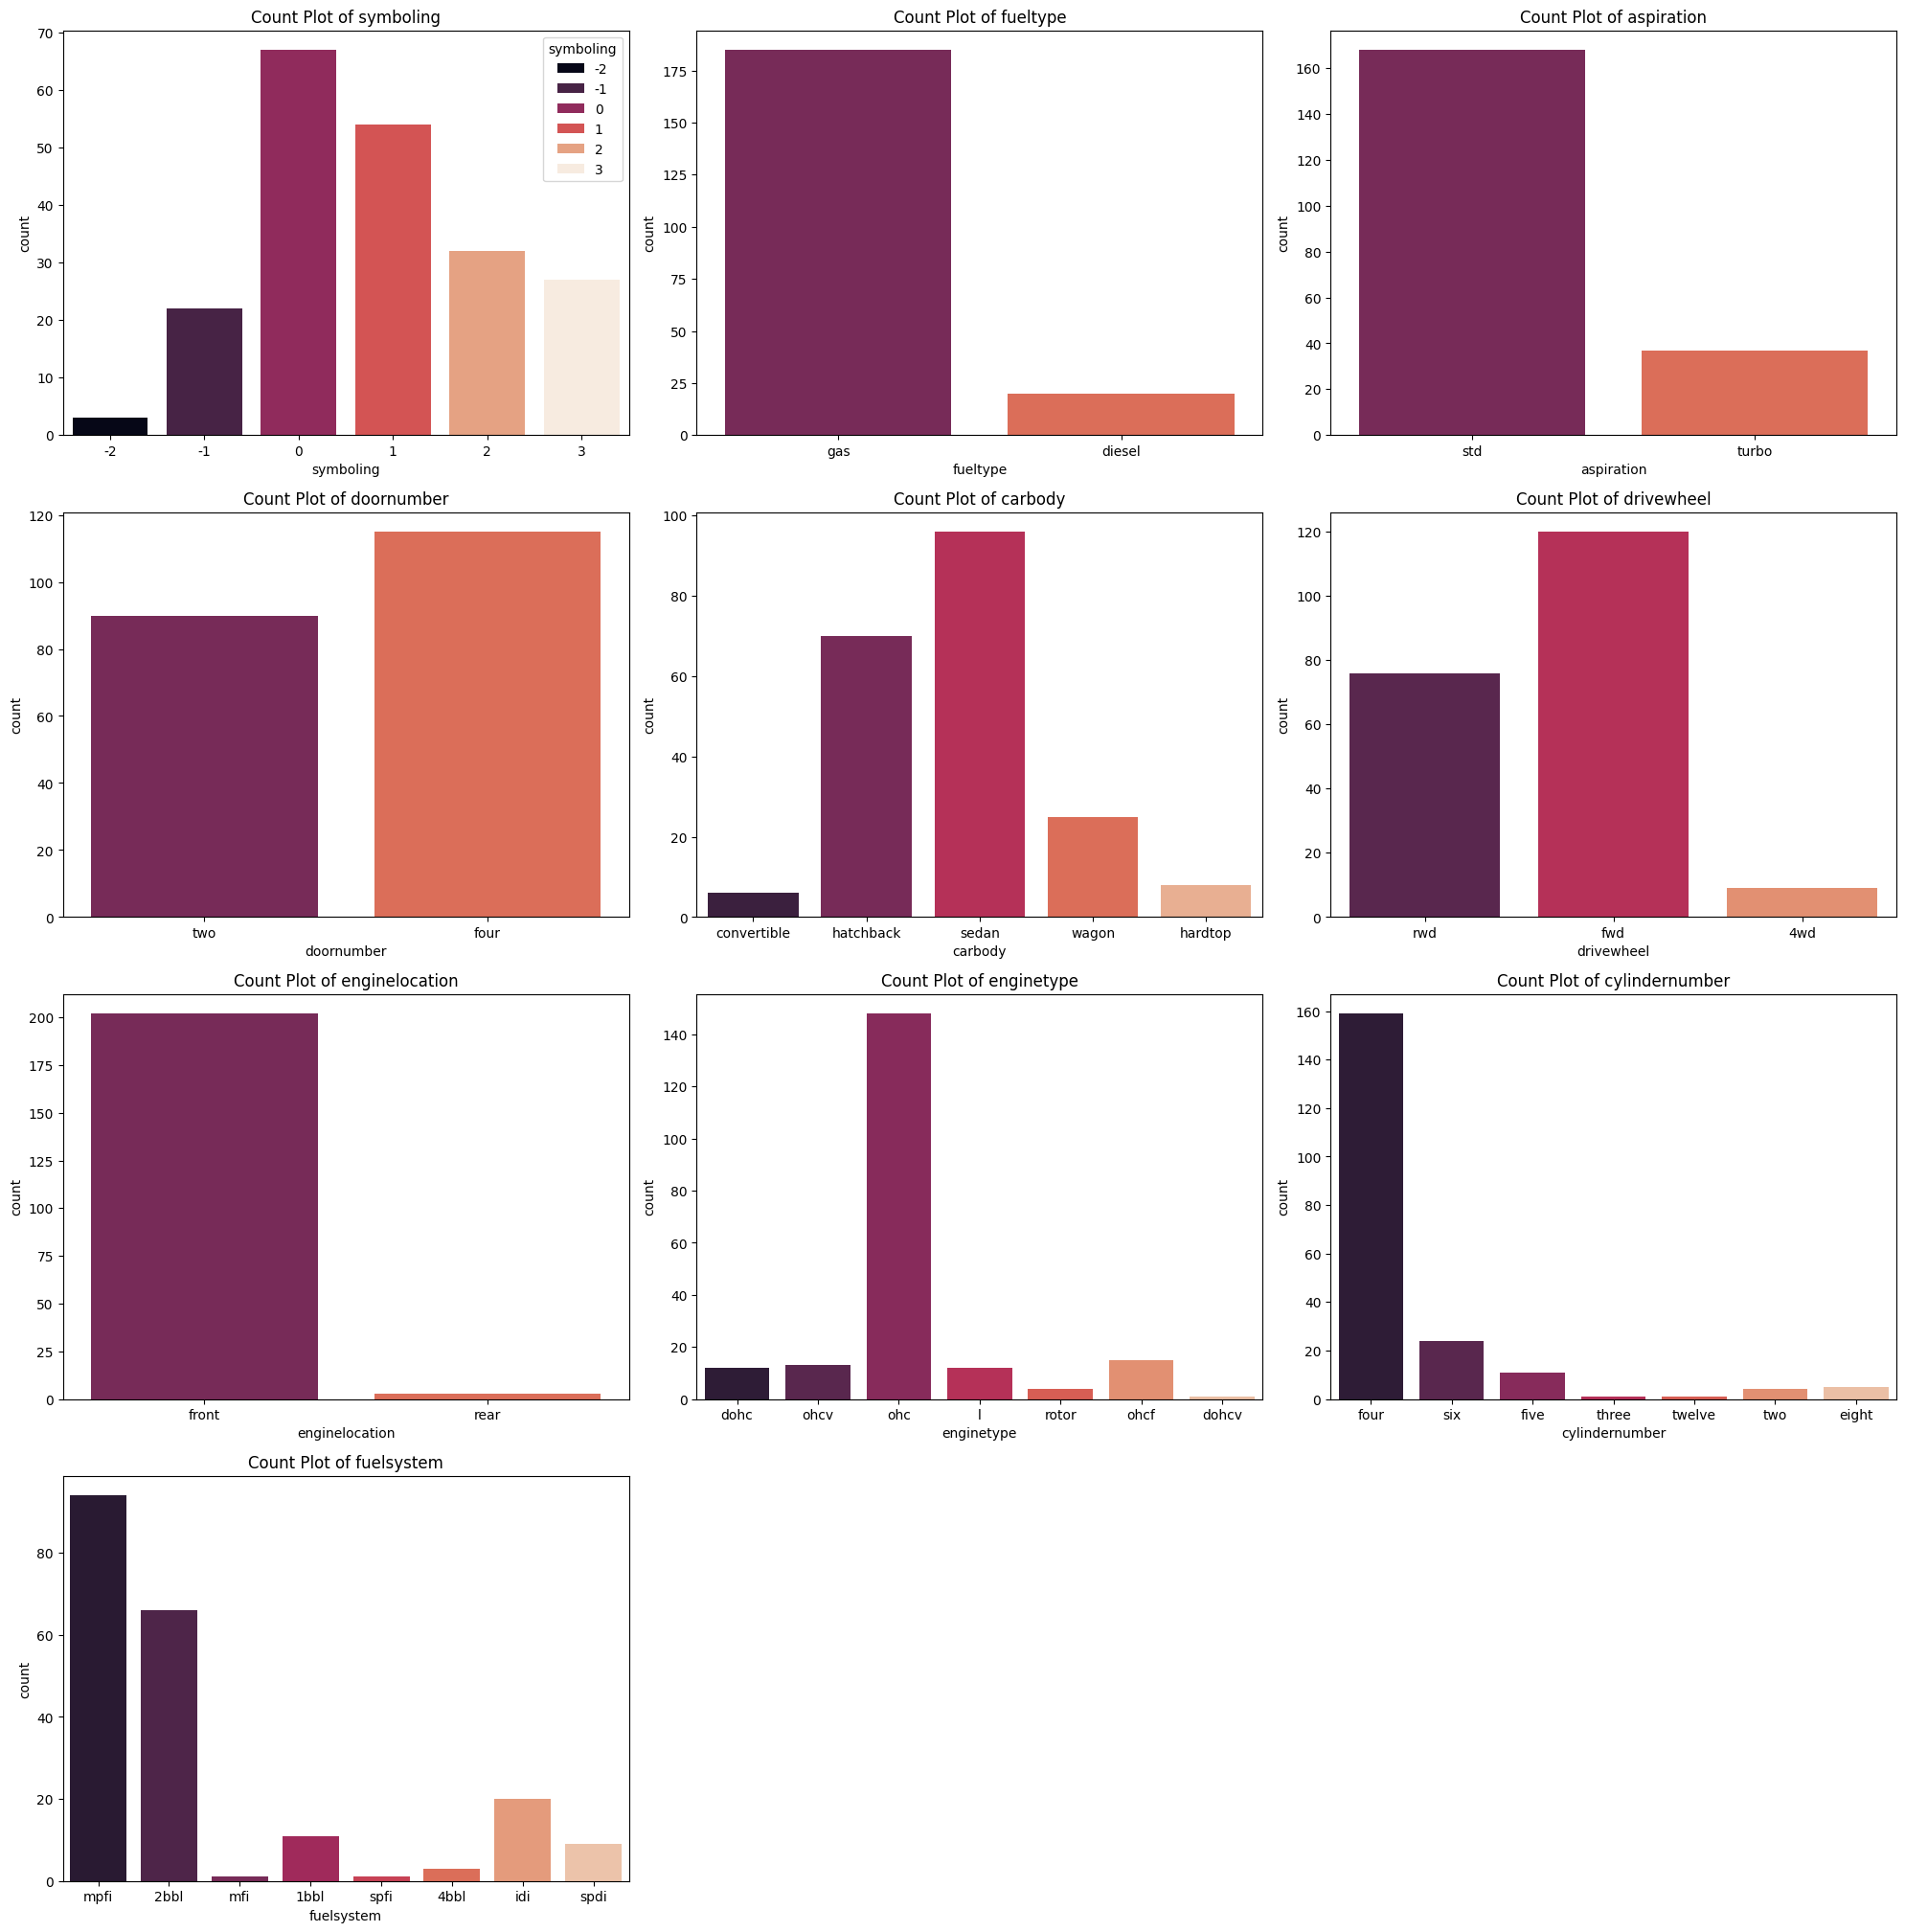

In [20]:
cleaner.categorical_plot(df,df.columns,8)

Column 'car_ID' is not countinuous.
Column 'symboling' is not countinuous.
Column 'CarName' is not countinuous.
Column 'fueltype' is not countinuous.
Column 'aspiration' is not countinuous.
Column 'doornumber' is not countinuous.
Column 'carbody' is not countinuous.
Column 'drivewheel' is not countinuous.
Column 'enginelocation' is not countinuous.
Column 'curbweight' is not countinuous.
Column 'enginetype' is not countinuous.
Column 'cylindernumber' is not countinuous.
Column 'fuelsystem' is not countinuous.
Column 'price' is not countinuous.


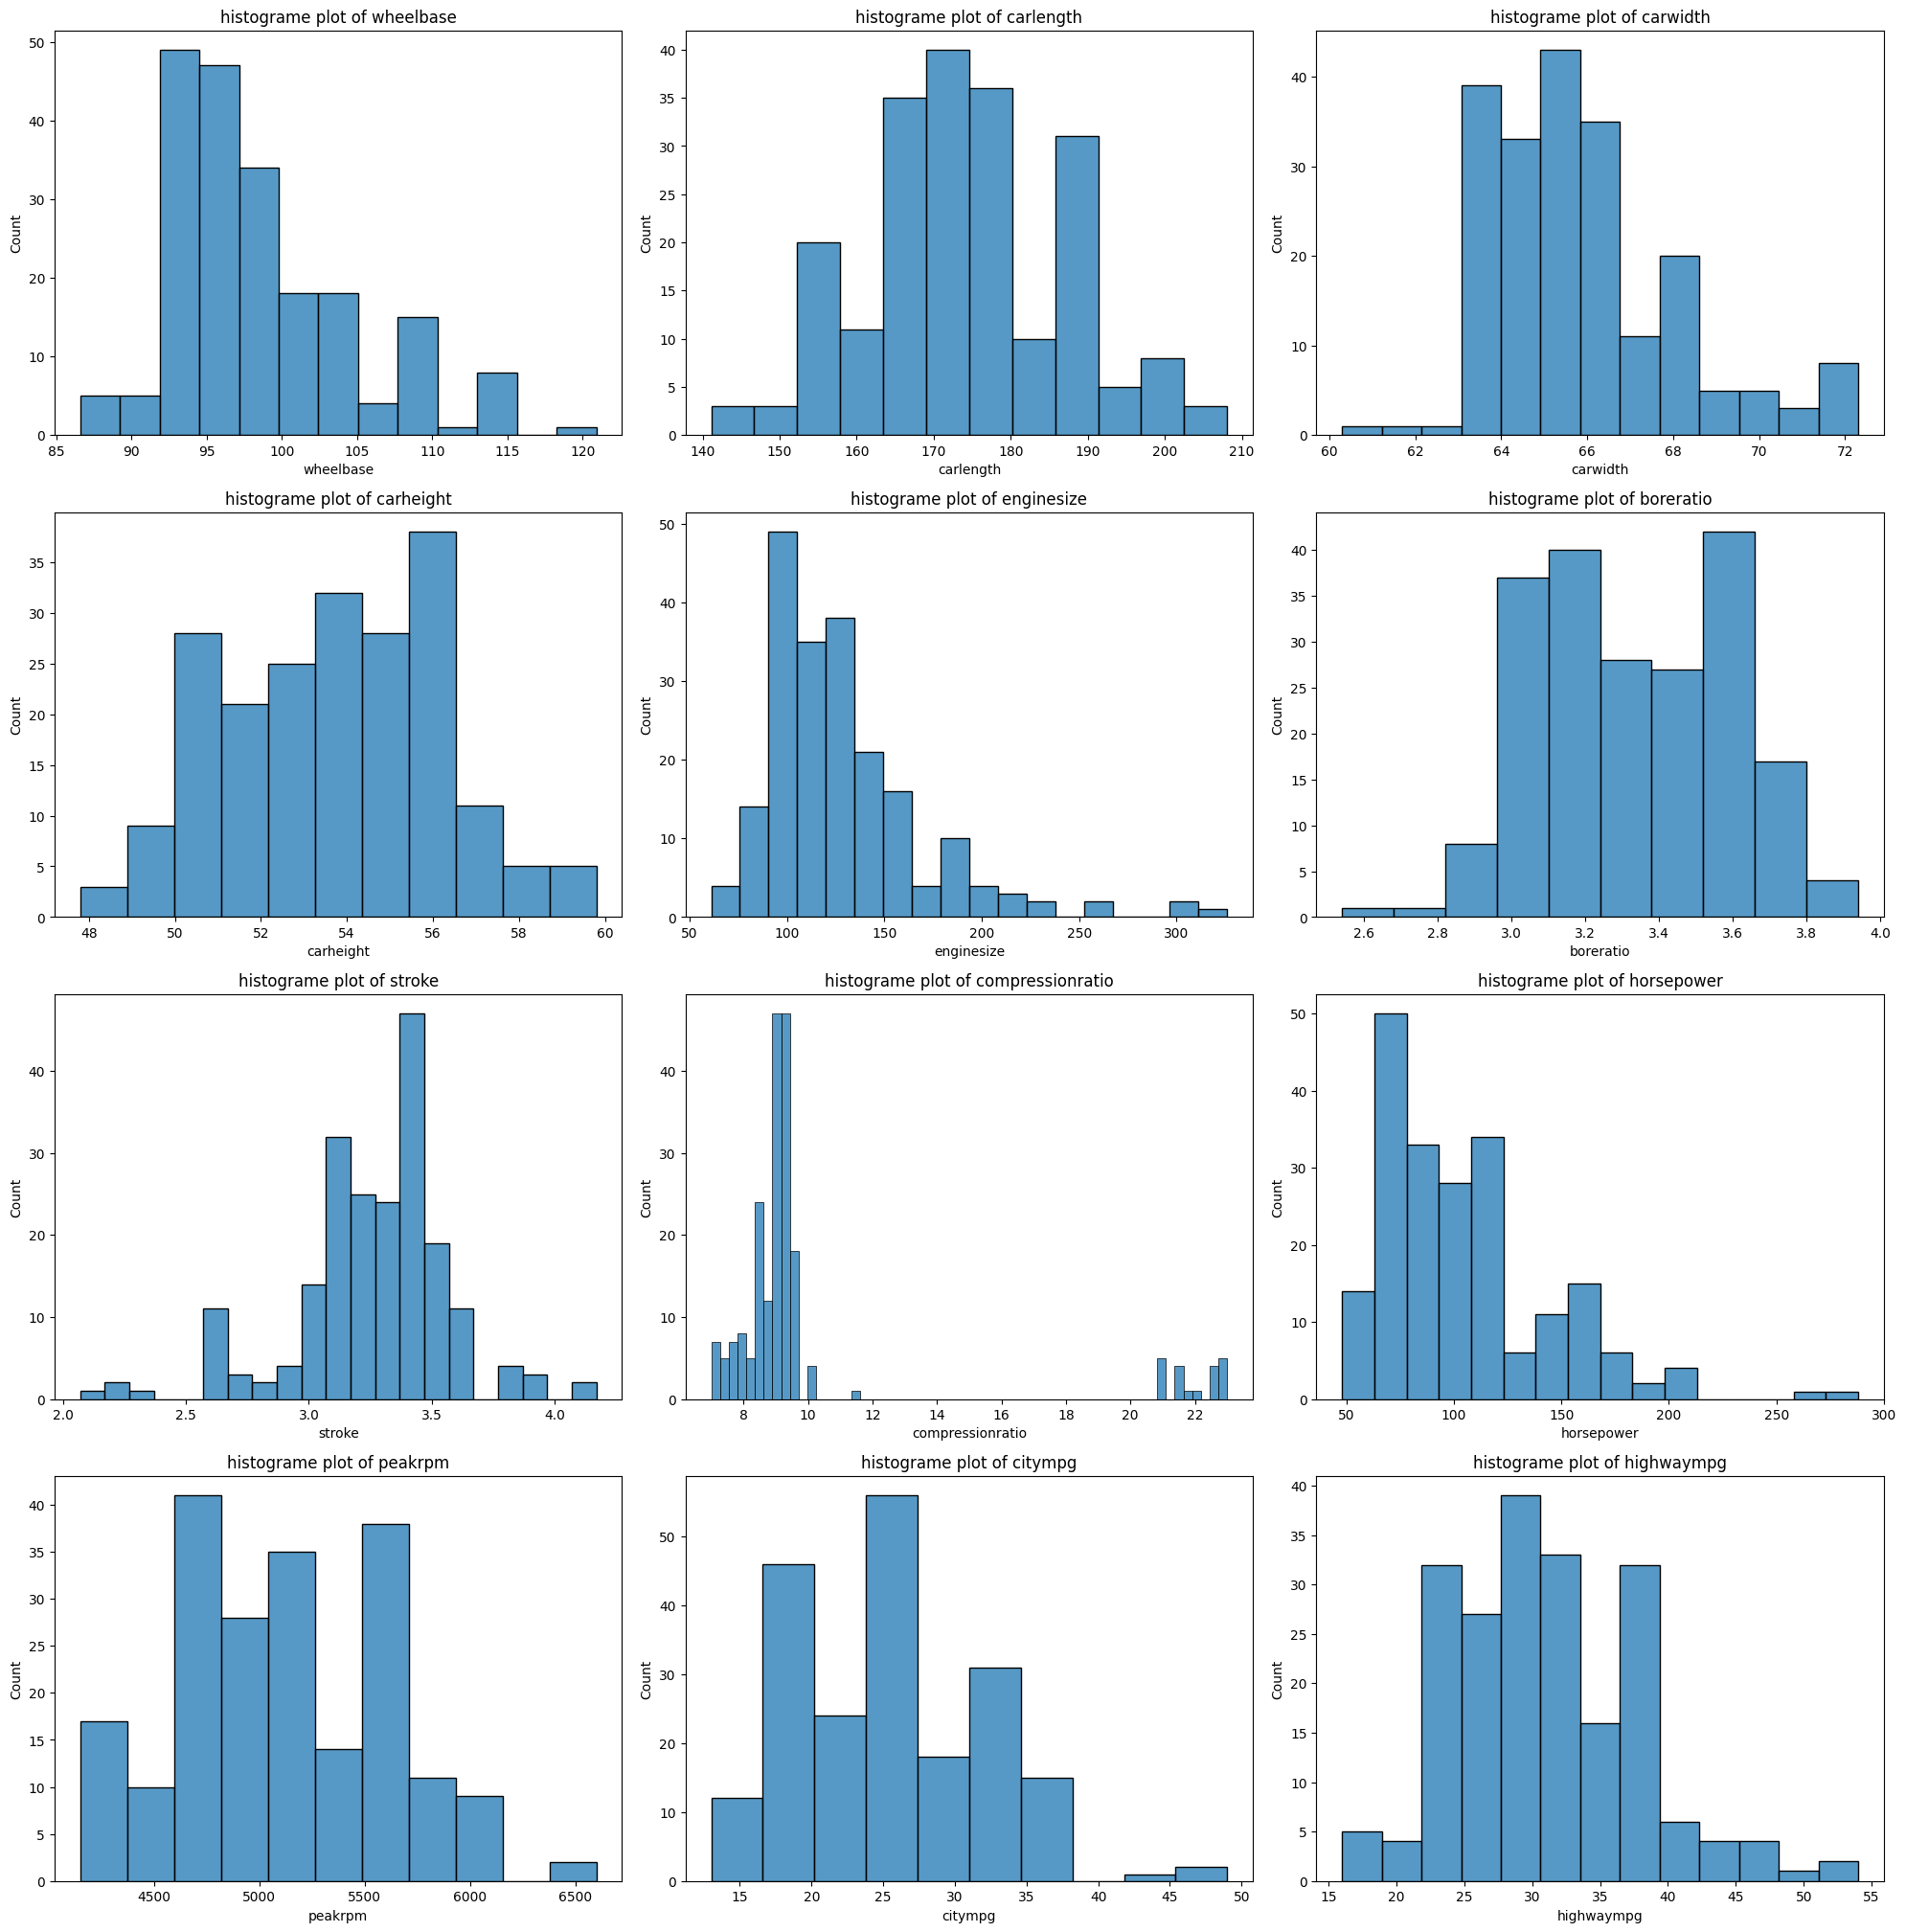

In [21]:
cleaner.continuous_plot(df,df.columns,7)

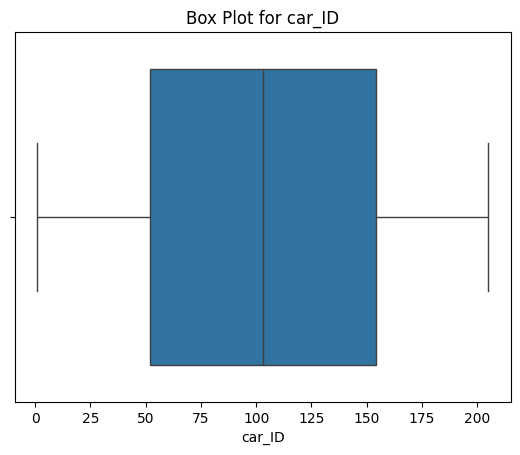

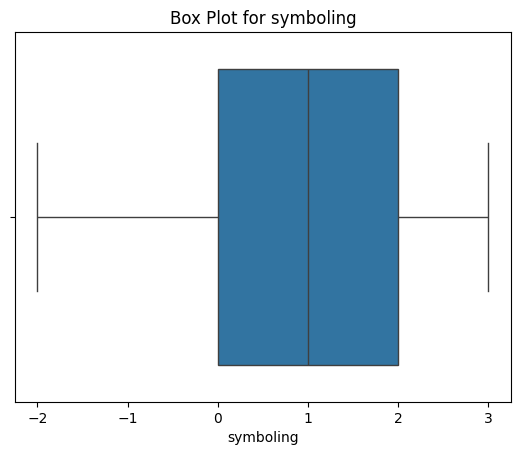

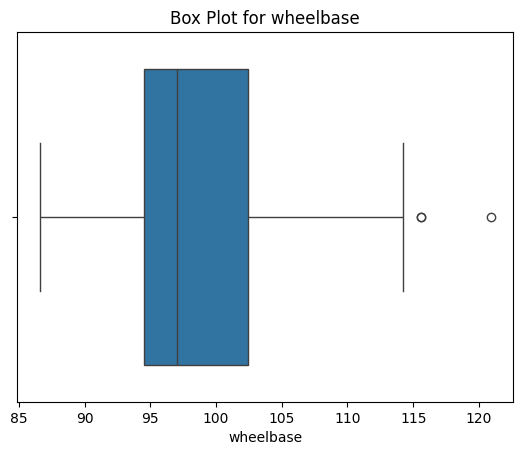

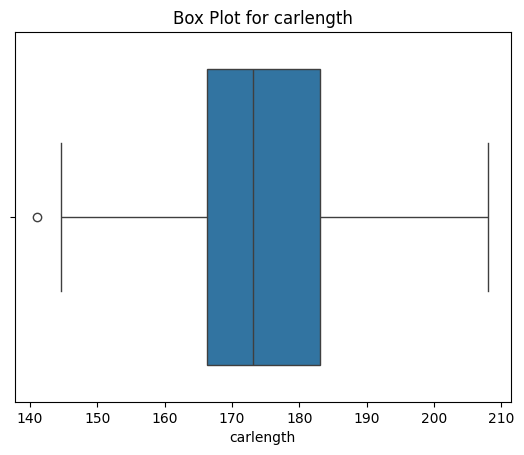

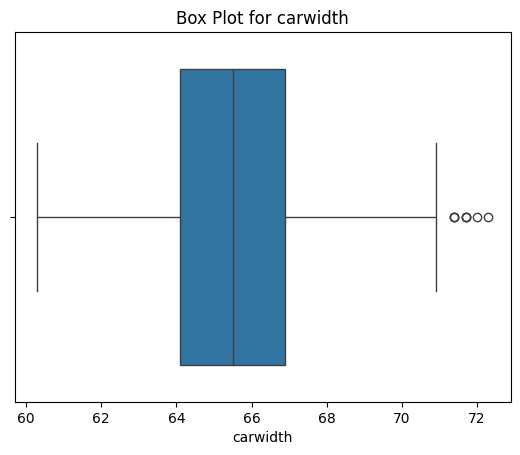

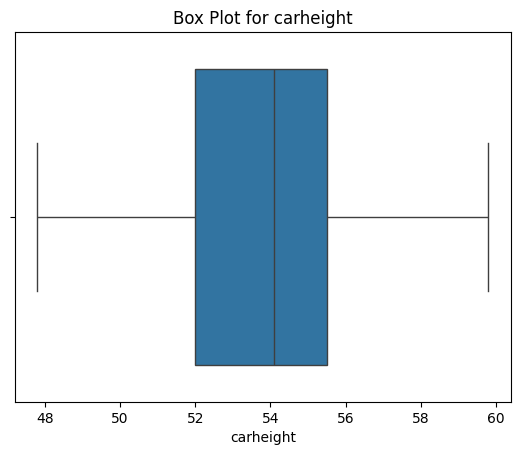

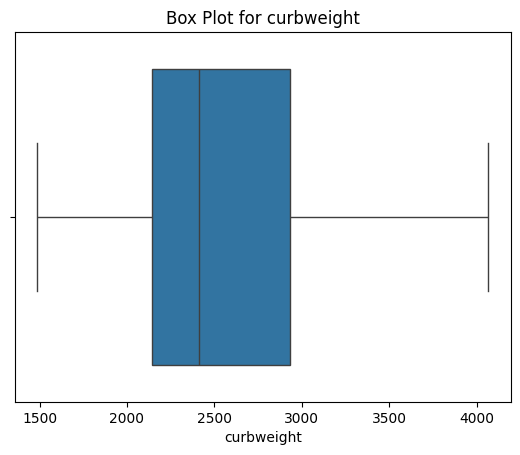

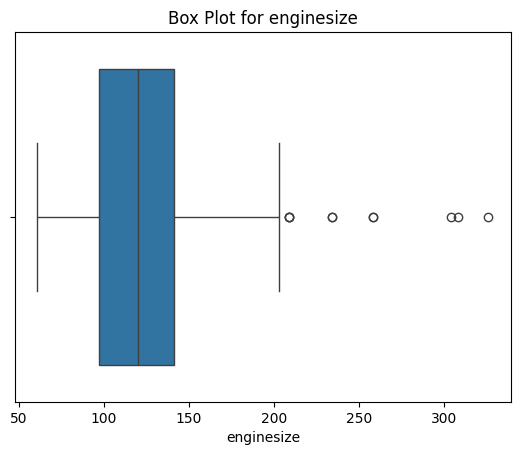

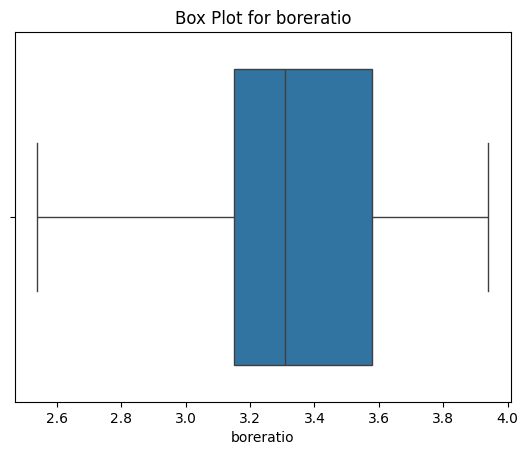

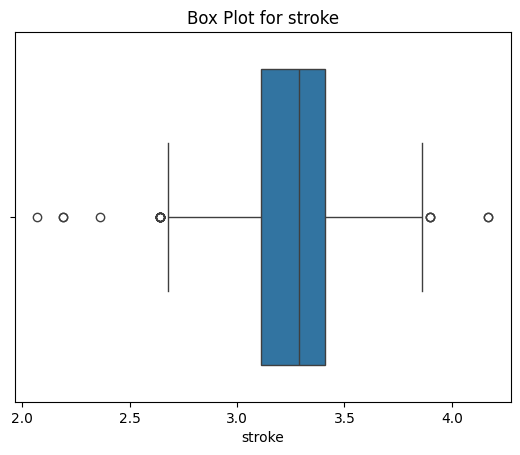

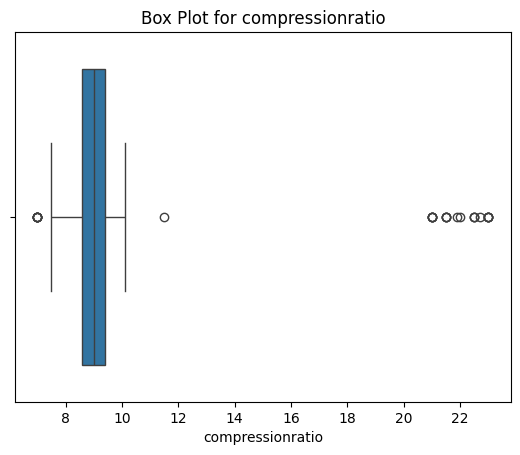

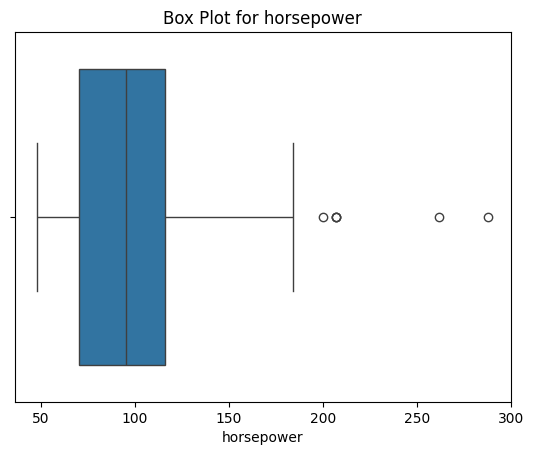

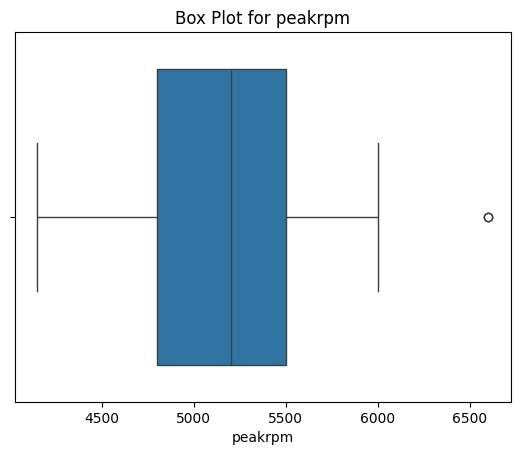

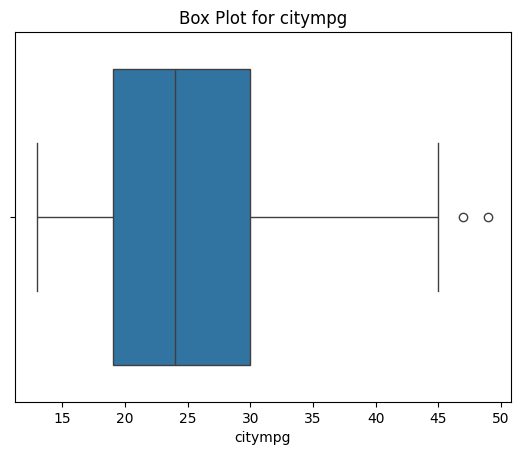

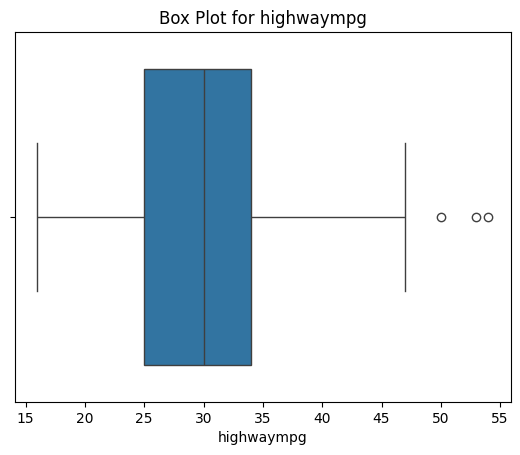

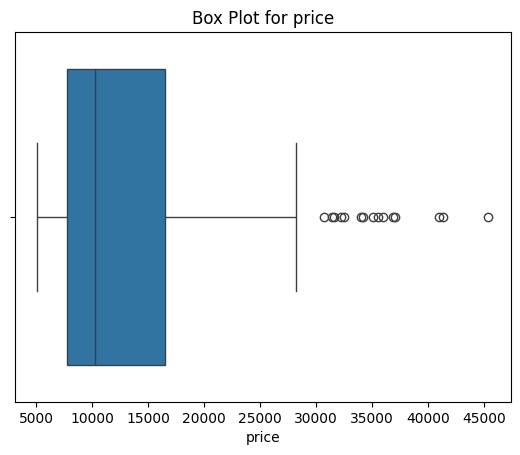

In [22]:
numeric_columns = df.select_dtypes(include=['number'])
for column in numeric_columns.columns:
  sns.boxplot(x=numeric_columns[column])
  plt.title(f"Box Plot for {column}")
  plt.show()



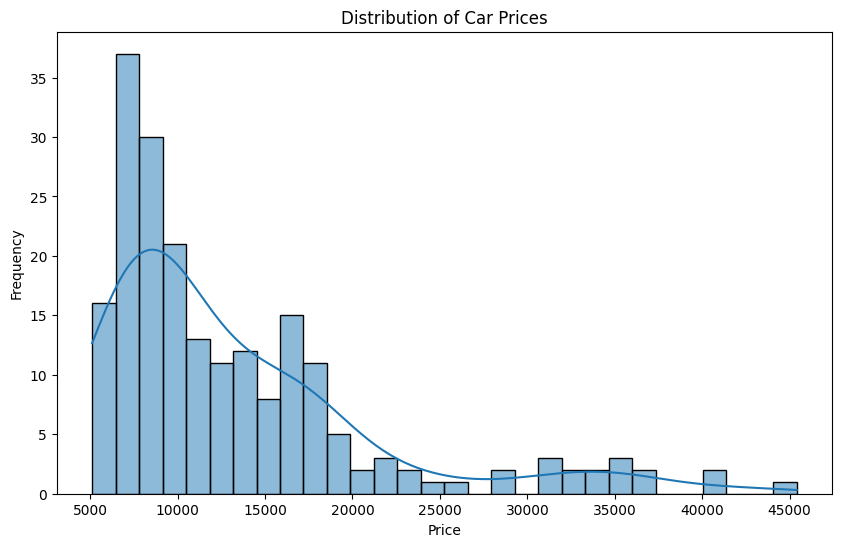

In [23]:
plt.figure(figsize=(10, 6))
sns.histplot(df['price'], kde=True, bins=30)
plt.title('Distribution of Car Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

In [24]:
df=df.drop(columns=['car_ID','CarName'],axis=1)

In [25]:
df.columns

Index(['symboling', 'fueltype', 'aspiration', 'doornumber', 'carbody',
       'drivewheel', 'enginelocation', 'wheelbase', 'carlength', 'carwidth',
       'carheight', 'curbweight', 'enginetype', 'cylindernumber', 'enginesize',
       'fuelsystem', 'boreratio', 'stroke', 'compressionratio', 'horsepower',
       'peakrpm', 'citympg', 'highwaympg', 'price'],
      dtype='object')

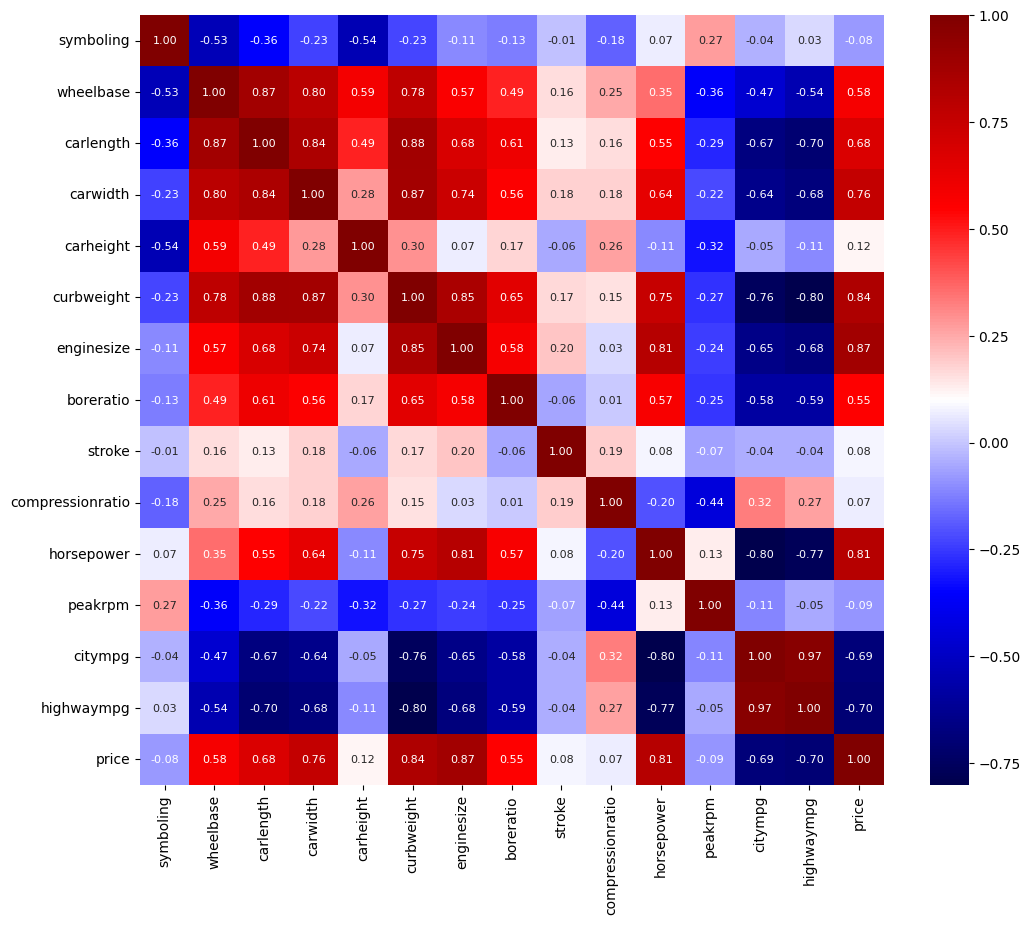

In [28]:
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="seismic", fmt=".2f", annot_kws={"size": 8})
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.show()

1.Positive correlation between wheelbase with carlength and carwidth

2.Positive correlation between price and carwidth,curbheight,enginesize,horsepower

3.Negative correlation between price and citympg,highwaympg

4.Negative correlation between curbweight and citympg,highwaympg

In [29]:
df.duplicated().sum()

1

In [30]:
df.drop_duplicates(inplace=True)

In [31]:
df=cleaner.remove_outliers_iqr_countinuous(df,df.columns)

In [32]:
df.shape

(128, 24)

204 rows reduced to 128 rows.

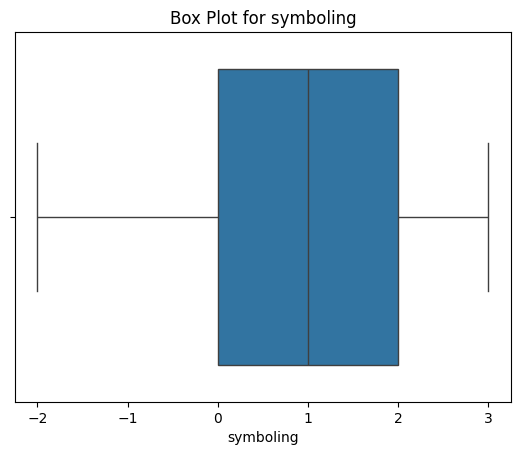

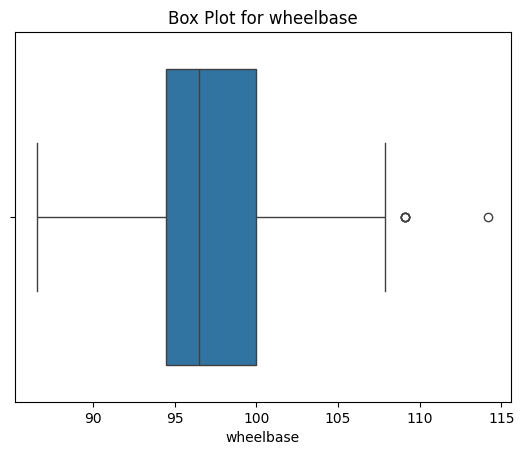

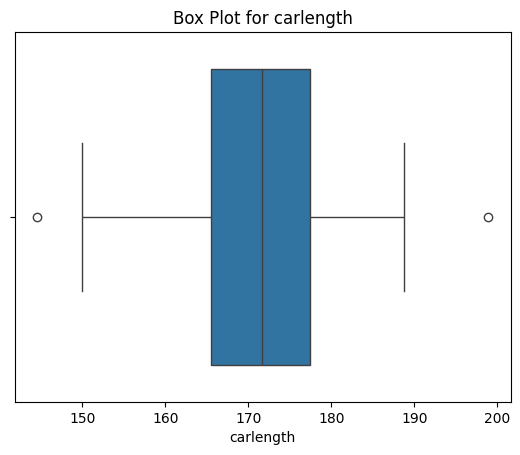

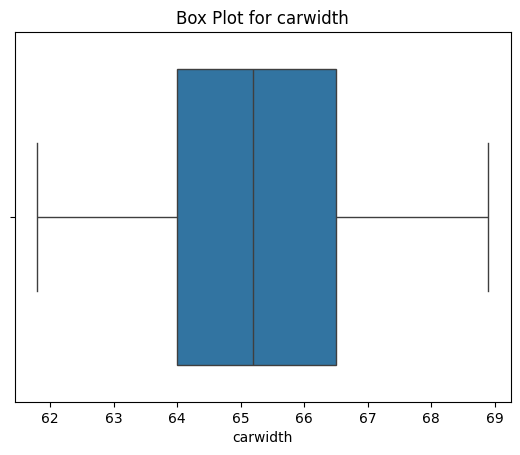

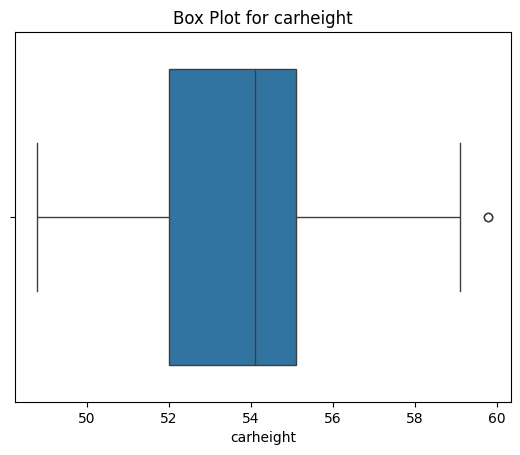

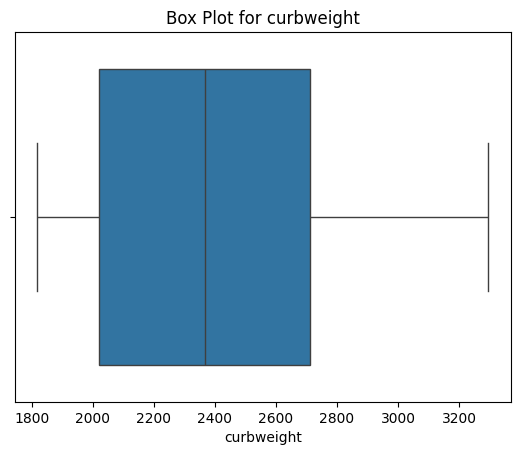

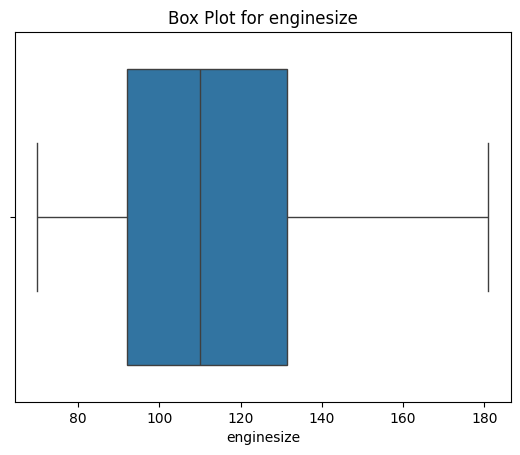

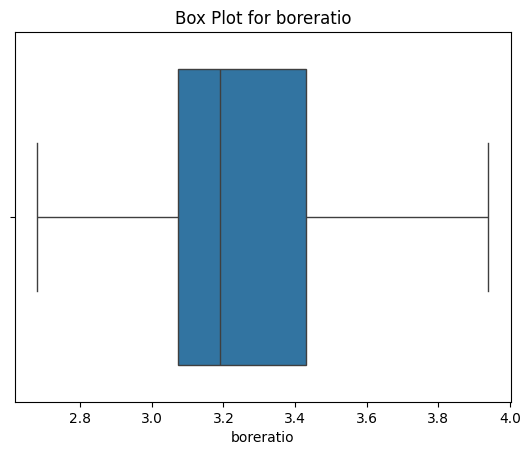

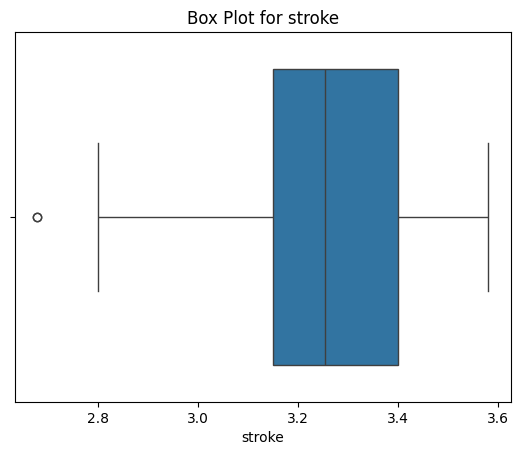

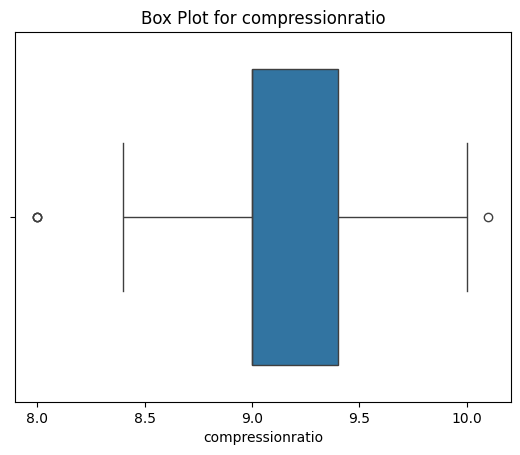

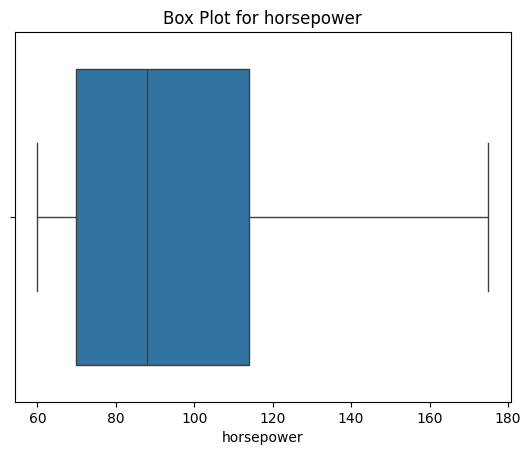

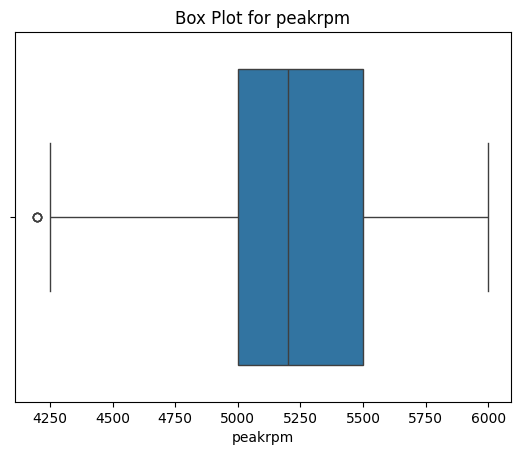

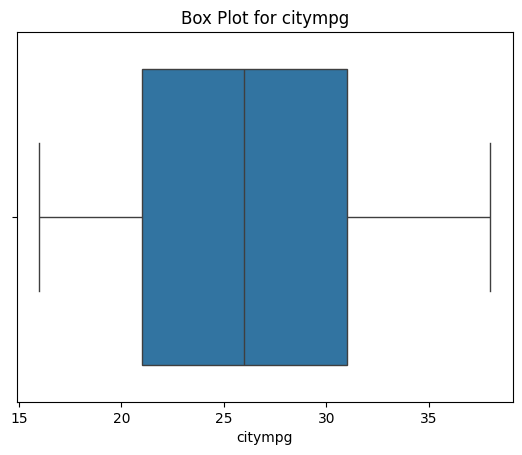

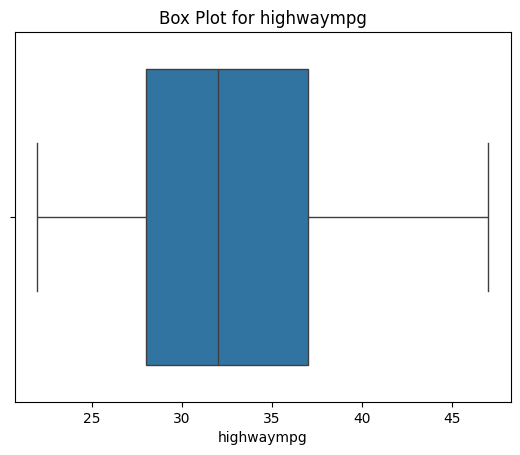

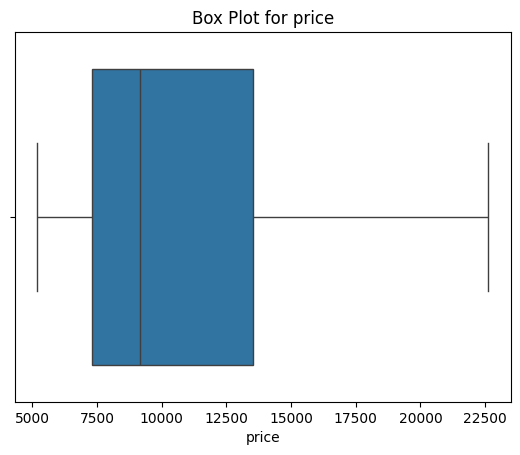

In [35]:
numeric_columns = df.select_dtypes(include=['number'])
for column in numeric_columns.columns:
  sns.boxplot(x=numeric_columns[column])
  plt.title(f"Box Plot for {column}")
  plt.show()

In [36]:
df.drop(columns=['symboling','stroke','compressionratio','carlength','carwidth'],axis=1,inplace=True)

In [37]:
df.shape

(128, 19)

In [38]:
df.skew(numeric_only=True).sort_values(ascending=False)

horsepower    0.978168
wheelbase     0.934026
price         0.821833
enginesize    0.775902
boreratio     0.481537
curbweight    0.417801
citympg       0.253650
carheight     0.210634
highwaympg    0.180369
peakrpm      -0.160371
dtype: float64

need to apply logtransform on first 4 as theyre right skewed

In [39]:
df['price']=np.log(df['price'])
df['wheelbase']=np.log(df['wheelbase'])
df['enginesize']=np.log(df['enginesize'])
df['horsepower']=np.log(df['horsepower'])

In [40]:
df.skew(numeric_only=True).sort_values(ascending=False)

wheelbase     0.773257
horsepower    0.533489
boreratio     0.481537
curbweight    0.417801
enginesize    0.330083
price         0.300668
citympg       0.253650
carheight     0.210634
highwaympg    0.180369
peakrpm      -0.160371
dtype: float64

In [41]:
df

,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,horsepower,peakrpm,citympg,highwaympg,price
0,gas,std,two,convertible,rwd,front,4.484132,48.8,2548,dohc,four,4.867534,mpfi,3.47,4.709530,5000,21,27,9.510075
1,gas,std,two,convertible,rwd,front,4.484132,48.8,2548,dohc,four,4.867534,mpfi,3.47,4.709530,5000,21,27,9.711116
2,gas,std,two,hatchback,rwd,front,4.548600,52.4,2823,ohcv,six,5.023881,mpfi,2.68,5.036953,5000,19,26,9.711116
3,gas,std,four,sedan,fwd,front,4.603168,54.3,2337,ohc,four,4.691348,mpfi,3.19,4.624973,5500,24,30,9.543235
4,gas,std,four,sedan,4wd,front,4.599152,54.3,2824,ohc,five,4.912655,mpfi,3.19,4.744932,5500,18,22,9.767095
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
123,gas,std,four,wagon,rwd,front,4.647271,57.5,3042,ohc,four,4.948760,mpfi,3.78,4.736198,5400,24,28,9.712024
124,gas,std,four,sedan,rwd,front,4.692265,55.5,2952,ohc,four,4.948760,mpfi,3.78,4.736198,5400,23,28,9.731809
125,gas,turbo,four,sedan,rwd,front,4.692265,55.5,3049,ohc,four,4.948760,mpfi,3.78,5.075174,5300,19,25,9.854560
126,gas,std,four,sedan,rwd,front,4.692265,55.5,3012,ohcv,six,5.153292,mpfi,3.58,4.897840,5500,18,23,9.975110


In [42]:
df['fueltype'] = df['fueltype'].map({'gas': 0, 'diesel': 1})
df['aspiration'] = df['aspiration'].map({'std': 0, 'turbo': 1})
df['doornumber'] = df['doornumber'].map({'two': 0, 'four': 1})
df['enginelocation'] = df['enginelocation'].map({'front': 0, 'rear': 1})
df['enginetype'] = df['enginetype'].map({'dohc': 0, 'ohc': 1, 'ohcf': 2, 'ohcv': 3, 'rotor': 4, 'dohcv': 5})
df['cylindernumber'] = df['cylindernumber'].map({'four': 0, 'six': 1, 'five': 2, 'eight': 3, 'two': 4, 'three': 5, 'twelve': 6})
df['fuelsystem'] = df['fuelsystem'].map({'mpfi': 0, '2bbl': 1, 'idi': 2, '1bbl': 3, 'spfi': 4})
df['drivewheel'] = df['drivewheel'].map({'fwd': 0, 'rwd': 1, '4wd': 2})
df['carbody'] = df['carbody'].map({'sedan': 0, 'hatchback': 1, 'wagon': 2, 'hardtop': 3, 'convertible': 4})

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128 entries, 0 to 127
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   fueltype        128 non-null    int64  
 1   aspiration      128 non-null    int64  
 2   doornumber      128 non-null    int64  
 3   carbody         128 non-null    int64  
 4   drivewheel      128 non-null    int64  
 5   enginelocation  128 non-null    int64  
 6   wheelbase       128 non-null    float64
 7   carheight       128 non-null    float64
 8   curbweight      128 non-null    int64  
 9   enginetype      125 non-null    float64
 10  cylindernumber  128 non-null    int64  
 11  enginesize      128 non-null    float64
 12  fuelsystem      125 non-null    float64
 13  boreratio       128 non-null    float64
 14  horsepower      128 non-null    float64
 15  peakrpm         128 non-null    int64  
 16  citympg         128 non-null    int64  
 17  highwaympg      128 non-null    int

In [45]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
numeric_columns = df.select_dtypes(include=['number'])
df[numeric_columns.columns] = scaler.fit_transform(df[numeric_columns.columns])

In [46]:
df

,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,horsepower,peakrpm,citympg,highwaympg,price
0,0.0,-0.201619,-1.098588,3.298916,1.197538,0.0,-2.125344,-2.058149,0.356489,-1.535240,-0.347114,0.631353,-0.816497,0.801679,0.683829,-0.518495,-0.894998,-0.854365,0.764156
1,0.0,-0.201619,-1.098588,3.298916,1.197538,0.0,-2.125344,-2.058149,0.356489,-1.535240,-0.347114,0.631353,-0.816497,0.801679,0.683829,-0.518495,-0.894998,-0.854365,1.288399
2,0.0,-0.201619,-1.098588,0.194054,1.197538,0.0,-0.707250,-0.542415,1.041521,2.490739,0.922330,1.341716,-0.816497,-2.403770,1.839993,-0.518495,-1.254120,-1.032184,1.288399
3,0.0,-0.201619,0.910259,-0.840900,-0.694868,0.0,0.493083,0.257556,-0.169117,-0.193247,-0.347114,-0.169156,-0.816497,-0.334429,0.385247,0.701493,-0.356316,-0.320908,0.850627
4,0.0,-0.201619,0.910259,-0.840900,3.089945,0.0,0.404742,0.257556,1.044012,-0.193247,2.191774,0.836359,-0.816497,-0.334429,0.808837,0.701493,-1.433680,-1.743461,1.434373
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
123,0.0,-0.201619,0.910259,1.229008,1.197538,0.0,1.463215,1.604876,1.587056,-0.193247,-0.347114,1.000403,-0.816497,2.059514,0.777997,0.457496,-0.356316,-0.676546,1.290769
124,0.0,-0.201619,0.910259,-0.840900,1.197538,0.0,2.452932,0.762801,1.362864,-0.193247,-0.347114,1.000403,-0.816497,2.059514,0.777997,0.457496,-0.535877,-0.676546,1.342361
125,0.0,4.959839,0.910259,-0.840900,1.197538,0.0,2.452932,0.762801,1.604493,-0.193247,-0.347114,1.000403,-0.816497,2.059514,1.974957,0.213498,-1.254120,-1.210004,1.662450
126,0.0,-0.201619,0.910259,-0.840900,1.197538,0.0,2.452932,0.762801,1.512325,2.490739,0.922330,1.929699,-0.816497,1.248008,1.348771,0.701493,-1.433680,-1.565642,1.976802


In [52]:
missing_values = df.isnull().sum()
print(missing_values[missing_values > 0])

enginetype    3
fuelsystem    3
dtype: int64


In [53]:
df=df.dropna()

In [54]:
x=df.drop(columns=['price'])
y=df['price']

In [55]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=42)

In [56]:
lr=LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [57]:
y_pred_test=lr.predict(x_test)
y_pred_train=lr.predict(x_train)

In [58]:
print(f"Training score:{lr.score(x_train,y_train)}")
print(f"Testing score:{lr.score(x_test,y_test)}")

Training score:0.8497195631606324
Testing score:0.8560844836027445


In [59]:
from sklearn import metrics
print('MSE: ',metrics.mean_squared_error(y_test,y_pred_test))
print('MAE: ',metrics.mean_absolute_error(y_test,y_pred_test))

MSE:  0.1263765750075447
MAE:  0.2733448250876646


In [61]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error

In [62]:
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(x_train, y_train)

Ridge()

In [63]:
y_pred = ridge_model.predict(x_test)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 0.1243131862672246


In [64]:
print(f"Training score:{ridge_model.score(x_train,y_train)}")
print(f"Testing score:{ridge_model.score(x_test,y_test)}")

Training score:0.8482701544281435
Testing score:0.8584342359684318


In [66]:
from sklearn.model_selection import GridSearchCV

In [67]:
param = {f'alpha': [0.1 * i for i in range(1, 11)]}

In [68]:
reg=GridSearchCV(Ridge(),param_grid=param)

In [69]:
reg.fit(x_train,y_train)

GridSearchCV(estimator=Ridge(),
             param_grid={'alpha': [0.1, 0.2, 0.30000000000000004, 0.4, 0.5,
                                   0.6000000000000001, 0.7000000000000001, 0.8,
                                   0.9, 1.0]})

In [70]:
reg.best_params_

{'alpha': 1.0}

In [73]:
print(f"Training score:{reg.score(x_train,y_train)}")
print(f"Testing score:{reg.score(x_test,y_test)}")

Training score:0.8482701544281435
Testing score:0.8584342359684318


i can't understand how this score is different from score above

In [74]:
from sklearn.preprocessing import PolynomialFeatures

In [76]:
poly=PolynomialFeatures()
lin=LinearRegression()

In [77]:
x_train_poly=poly.fit_transform(x_train)
x_test_poly=poly.fit_transform(x_test)
lin.fit(x_train_poly,y_train)

LinearRegression()

In [79]:
print(f"Training score:{lin.score(x_train_poly,y_train)}")
print(f"Testing score:{lin.score(x_test_poly,y_test)}")

Training score:0.9982884602635272
Testing score:-1.6568524277547718e+21
